In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as k
from keras import losses
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from keras import backend
from keras.datasets.cifar import load_batch
from keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import keras_export

In [ ]:
@keras_export("keras.datasets.cifar10.load_data")
def load_data():
    dirname = "cifar-10-batches-py"
    origin = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    path = get_file(
        dirname,
        origin=origin,
        untar=True,
        file_hash="6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce", 
    )

    num_train_samples = 50000

    x_train = np.empty((num_train_samples, 3, 32, 32), dtype="uint8")
    y_train = np.empty((num_train_samples,), dtype="uint8")

    for i in range(1, 6):
        fpath = os.path.join(path, "data_batch_" + str(i))
        (
            x_train[(i - 1) * 10000 : i * 10000, :, :, :],
            y_train[(i - 1) * 10000 : i * 10000],
        ) = load_batch(fpath)

    fpath = os.path.join(path, "test_batch")
    x_test, y_test = load_batch(fpath)

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if backend.image_data_format() == "channels_last":
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    x_test = x_test.astype(x_train.dtype)
    y_test = y_test.astype(y_train.dtype)

    # x_train = x_train[np.where(y_train[:,0]< 3)[0],:]
    # y_train = y_train[np.where(y_train[:,0]< 3)[0],:]
    # x_test = x_test[np.where(y_test[:,0]< 3)[0],:]
    # y_test = y_test[np.where(y_test[:,0]< 3)[0],:]

    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    data = (x_train, y_train, x_test, y_test)
    return data

dataGen = load_data()
print(dataGen[0].shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)


In [ ]:
inpShape = tf.keras.layers.Input(shape = (32,32,3))

x = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(inpShape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Dropout(0.1)(x)

x = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Dropout(0.1)(x)

x = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Dropout(0.1)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)
x = tf.keras.layers.Dense(10,activation='softmax')(x)

model1 = tf.keras.Model(inputs = inpShape,outputs = x)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856 

In [ ]:
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/cifar01-loss_{loss:.3f}_val_acc{val_accuracy:.3f}.h5',
        monitor = 'val_accuracy',
        save_best_only = True
        ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor = 'loss',
        factor = 0.1,
        patience = 3,
        min_lr = 1e-5
    ),
]

adam = tf.keras.optimizers.Adam(1e-2)


model1.compile(
    loss = 'categorical_crossentropy' ,
    optimizer=adam,
	metrics=["accuracy"]
)

history1 = model1.fit(
    dataGen[0], dataGen[1],
    epochs = 50,
    batch_size = 512,
    validation_data=(dataGen[2], dataGen[3]),
    callbacks=my_callbacks)

Epoch 1/50
98/98 [==============================] - 15s 59ms/step - loss: 2.1577 - accuracy: 0.2425 - val_loss: 1.9932 - val_accuracy: 0.2657 - lr: 0.0100
Epoch 2/50
98/98 [==============================] - 4s 45ms/step - loss: 1.5374 - accuracy: 0.4151 - val_loss: 2.4135 - val_accuracy: 0.2681 - lr: 0.0100
Epoch 3/50
98/98 [==============================] - 4s 46ms/step - loss: 1.2317 - accuracy: 0.5512 - val_loss: 2.3654 - val_accuracy: 0.3292 - lr: 0.0100
Epoch 4/50
98/98 [==============================] - 4s 45ms/step - loss: 1.0158 - accuracy: 0.6345 - val_loss: 1.2182 - val_accuracy: 0.5733 - lr: 0.0100
Epoch 5/50
98/98 [==============================] - 4s 45ms/step - loss: 0.8989 - accuracy: 0.6780 - val_loss: 1.3352 - val_accuracy: 0.5511 - lr: 0.0100
Epoch 6/50
98/98 [==============================] - 4s 45ms/step - loss: 0.8212 - accuracy: 0.7056 - val_loss: 1.0928 - val_accuracy: 0.6181 - lr: 0.0100
Epoch 7/50
98/98 [==============================] - 4s 45ms/step - loss: 0.

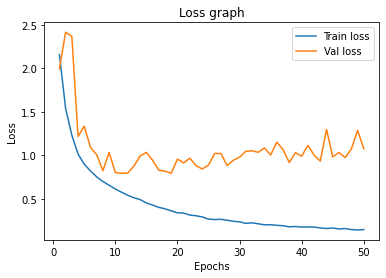

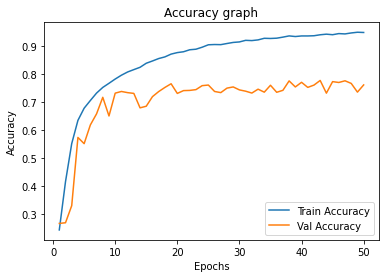

In [ ]:
dict1 = history1.history
loss = dict1['loss']
val_loss = dict1['val_loss']
accuracy = dict1['accuracy']
val_accuracy = dict1['val_accuracy']
epochs = range(1,len(loss)+1)


plt.plot(epochs,loss, label='Train loss')
plt.plot(epochs,val_loss,label='Val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss graph")
plt.show()

print("\n")

plt.clf()
plt.plot(epochs,accuracy, label='Train Accuracy')
plt.plot(epochs,val_accuracy,label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy graph")
plt.show()

In [ ]:
#Inception block

x1 = tf.keras.layers.Conv2D(64,(3,3),padding='valid',activation='relu')(inpShape)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.AveragePooling2D()(x1)
x1 = tf.keras.layers.Dropout(0.1)(x1)

x2 = tf.keras.layers.Conv2D(128,(3,3),padding='valid',activation='relu')(x1)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.AveragePooling2D()(x2)
x2 = tf.keras.layers.Dropout(0.1)(x2)

x3 = tf.keras.layers.Conv2D(128,(3,3),padding='valid',activation='relu')(x2)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.AveragePooling2D()(x3)
x3 = tf.keras.layers.Dropout(0.1)(x3)

x4 = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(x3)
x4 = tf.keras.layers.BatchNormalization()(x4)
x4 = tf.keras.layers.AveragePooling2D()(x4)
x4 = tf.keras.layers.Dropout(0.1)(x4)

b1 = tf.keras.layers.Conv2D(128, (1,1), activation='relu', padding='same')(x4)
b1 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(b1)
b1 = tf.keras.layers.Dropout(0.1)(b1)

b2 = tf.keras.layers.AveragePooling2D((3,3), strides = (1,1), padding='same')(x4)
b2 = tf.keras.layers.Conv2D(128, (1,1), activation='relu', padding='same')(b2)
b2 = tf.keras.layers.Dropout(0.1)(b2)

concat = tf.keras.layers.concatenate([b1, b2], axis=3)
concat = tf.keras.layers.BatchNormalization()(concat)
out = tf.keras.layers.Flatten()(concat)
out = tf.keras.layers.Dense(10,activation='softmax')(out)

model2 = tf.keras.Model(inputs = inpShape, outputs = out)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 30, 30, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 30, 30, 64)  256         ['conv2d_3[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 average_pooling2d (AveragePool  (None, 15, 15, 64)  0           ['batch_normalization_3[0][

In [ ]:
my_callbacks = [
    # tf.keras.callbacks.EarlyStopping(patience=15),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/cifar02-loss_{loss:.3f}_val_acc{val_accuracy:.3f}.h5',
        monitor = 'val_accuracy',
        save_best_only = True
        ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor = 'loss',
        factor = 0.1,
        patience = 3,
        min_lr = 1e-5
    ),
]

adam = tf.keras.optimizers.Adam(1e-3)


model2.compile(
    loss = 'categorical_crossentropy' ,
    optimizer=adam,
	metrics=["accuracy"]
)

history2 = model2.fit(
    dataGen[0], dataGen[1],
    epochs = 50,
    batch_size = 512,
    validation_data=(dataGen[2], dataGen[3]),
    callbacks=my_callbacks)

Epoch 1/50
98/98 [==============================] - 7s 56ms/step - loss: 1.6165 - accuracy: 0.4244 - val_loss: 2.3033 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/50
98/98 [==============================] - 4s 41ms/step - loss: 1.1879 - accuracy: 0.5748 - val_loss: 3.0422 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 3/50
98/98 [==============================] - 4s 41ms/step - loss: 0.9888 - accuracy: 0.6468 - val_loss: 6.0166 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/50
98/98 [==============================] - 4s 41ms/step - loss: 0.8512 - accuracy: 0.6994 - val_loss: 6.0446 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 5/50
98/98 [==============================] - 4s 42ms/step - loss: 0.7488 - accuracy: 0.7365 - val_loss: 6.1812 - val_accuracy: 0.1061 - lr: 0.0010
Epoch 6/50
98/98 [==============================] - 4s 42ms/step - loss: 0.6725 - accuracy: 0.7641 - val_loss: 3.4670 - val_accuracy: 0.2719 - lr: 0.0010
Epoch 7/50
98/98 [==============================] - 4s 42ms/step - loss: 0.6

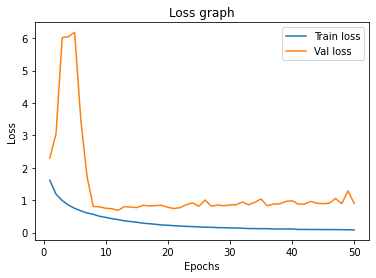

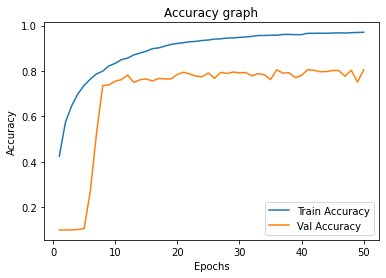

In [ ]:
dict1 = history2.history
loss = dict1['loss']
val_loss = dict1['val_loss']
accuracy = dict1['accuracy']
val_accuracy = dict1['val_accuracy']
epochs = range(1,len(loss)+1)


plt.plot(epochs,loss, label='Train loss')
plt.plot(epochs,val_loss,label='Val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss graph")
plt.show()

print("\n")

plt.clf()
plt.plot(epochs,accuracy, label='Train Accuracy')
plt.plot(epochs,val_accuracy,label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy graph")
plt.show()

In [ ]:
#Residual block

x1 = tf.keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu')(inpShape)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.AveragePooling2D()(x1)
x1 = tf.keras.layers.Dropout(0.1)(x1)

x2 = tf.keras.layers.Conv2D(64,(3,3),padding='valid',activation='relu')(x1)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.AveragePooling2D()(x2)
x2 = tf.keras.layers.Dropout(0.1)(x2)

x3 = tf.keras.layers.Conv2D(64,(3,3),padding='valid',activation='relu')(x2)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.AveragePooling2D()(x3)
x3 = tf.keras.layers.Dropout(0.1)(x3)

x4 = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x3)
x4 = tf.keras.layers.BatchNormalization()(x4)
x4 = tf.keras.layers.Dropout(0.1)(x4)

x5 = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x4)
x5 = tf.keras.layers.BatchNormalization()(x5)
x5 = tf.keras.layers.Dropout(0.1)(x5)

x6 = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x5)
x6 = tf.keras.layers.BatchNormalization()(x6)
x6 = tf.keras.layers.Dropout(0.1)(x6)
add = tf.keras.layers.add([x6,x3])

out = tf.keras.layers.Flatten()(add)
out = tf.keras.layers.Dense(10,activation='softmax')(out)

model3 = tf.keras.Model(inputs = inpShape, outputs = out)
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 30, 30, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 30, 30, 32)  128         ['conv2d_10[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 average_pooling2d_5 (AveragePo  (None, 15, 15, 32)  0           ['batch_normalization_8[0][

In [ ]:
my_callbacks = [
    # tf.keras.callbacks.EarlyStopping(patience=15),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/cifar03-loss_{loss:.3f}_val_acc{val_accuracy:.3f}.h5',
        monitor = 'val_accuracy',
        save_best_only = True
        ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor = 'loss',
        factor = 0.1,
        patience = 3,
        min_lr = 1e-5
    ),
]

adam = tf.keras.optimizers.Adam(1e-2)


model3.compile(
    loss = 'categorical_crossentropy' ,
    optimizer=adam,
	metrics=["accuracy"]
)

history3 = model3.fit(
    dataGen[0], dataGen[1],
    epochs = 100,
    batch_size = 512,
    validation_data=(dataGen[2], dataGen[3]),
    callbacks=my_callbacks)

Epoch 1/100
98/98 [==============================] - 4s 31ms/step - loss: 1.8130 - accuracy: 0.3819 - val_loss: 3.6468 - val_accuracy: 0.1170 - lr: 0.0100
Epoch 2/100
98/98 [==============================] - 2s 23ms/step - loss: 1.3886 - accuracy: 0.5102 - val_loss: 2.9883 - val_accuracy: 0.2042 - lr: 0.0100
Epoch 3/100
98/98 [==============================] - 2s 23ms/step - loss: 1.2008 - accuracy: 0.5737 - val_loss: 3.5764 - val_accuracy: 0.2366 - lr: 0.0100
Epoch 4/100
98/98 [==============================] - 2s 23ms/step - loss: 1.0777 - accuracy: 0.6195 - val_loss: 2.4807 - val_accuracy: 0.3442 - lr: 0.0100
Epoch 5/100
98/98 [==============================] - 2s 23ms/step - loss: 0.9860 - accuracy: 0.6513 - val_loss: 1.3964 - val_accuracy: 0.5426 - lr: 0.0100
Epoch 6/100
98/98 [==============================] - 2s 23ms/step - loss: 0.9016 - accuracy: 0.6843 - val_loss: 1.0599 - val_accuracy: 0.6307 - lr: 0.0100
Epoch 7/100
98/98 [==============================] - 2s 23ms/step - lo

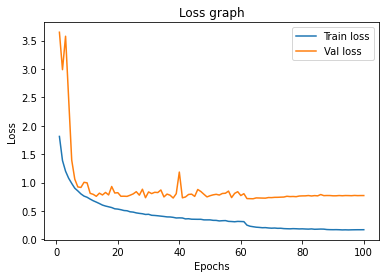

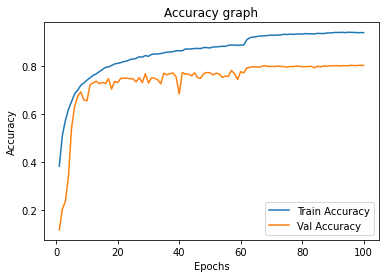

In [ ]:
dict1 = history3.history
loss = dict1['loss']
val_loss = dict1['val_loss']
accuracy = dict1['accuracy']
val_accuracy = dict1['val_accuracy']
epochs = range(1,len(loss)+1)


plt.plot(epochs,loss, label='Train loss')
plt.plot(epochs,val_loss,label='Val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss graph")
plt.show()

print("\n")

plt.clf()
plt.plot(epochs,accuracy, label='Train Accuracy')
plt.plot(epochs,val_accuracy,label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy graph")
plt.show()